In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 10
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie
  
  CairoMakie.activate!(type = string(fig_format))
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/run/media/alf/datos/misrepositorios/presentaciones/presentacion-calculo-numerico-simbolico-julia"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


In [2]:
println("¡Hola Julia!")

¡Hola Julia!


In [3]:
x = [1, 2, 3, 4, 5]
n = length(x)  
media = sum(x) / n
varianza = sum(x.^2) / n - media^2
(media, varianza)

(3.0, 2.0)

In [4]:
typeof(1)

Int64

In [5]:
typeof(Int16(1))

Int16

In [6]:
typeof(1.0)

Float64

In [7]:
typeof(1.0f0)

Float32

In [8]:
typeof(1//2)

Rational{Int64}

In [9]:
typeof(pi)

Irrational{:π}

In [10]:
typeof(1+1im)

Complex{Int64}

In [11]:
BigFloat(pi)

3.141592653589793238462643383279502884197169399375105820974944592307816406286198

In [12]:
BigFloat(pi, precision = 1000)

3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412736

In [13]:
struct EvenInt <: Integer
    num :: Signed

    # inner constructor
    function EvenInt(num)
        @assert iseven(num)
        new(num)
    end
end

EvenInt(4)

EvenInt(4)

In [14]:
4 // 6

2//3

In [15]:
4 // 6 == 2 // 3

true

In [16]:
1 // 6 + 2 // 4

2//3

In [17]:
2 // 3 - 1 // 6

1//2

In [18]:
2 // 3 * 3 // 4

1//2

In [19]:
3 // 4 / 2 // 3

9//8

In [20]:
(1 + 2im) + (1 - im)

2 + 1im

In [21]:
(1 + 2im) - (1 + im)

0 + 1im

In [22]:
(1 + 2im) * (2 - 3im)

8 + 1im

In [23]:
(1 + 2im) / (1 - 2im)

-0.6 + 0.8im

In [24]:
typeof(Int16(1) + 2)

Int64

In [25]:
typeof(1.0 + 2)

Float64

In [26]:
typeof(1 / 2)

Float64

In [27]:
typeof(1 // 2 + 0.5)

Float64

In [28]:
typeof(sqrt(1 // 2))

Float64

In [29]:
typeof((1 // 2) ^ 2.0)

Float64

In [30]:
typeof(1.0 + 2)

Float64

In [31]:
typeof(2(1+0im))

Complex{Int64}

In [32]:
typeof(im^2)

Complex{Int64}

In [33]:
typeof([1, 2, 3])

Vector{Int64} (alias for Array{Int64, 1})

In [34]:
typeof([1 2 3; 4 5 6])

Matrix{Int64} (alias for Array{Int64, 2})

In [35]:
typeof((1, "enero", 2020))

Tuple{Int64, String, Int64}

In [36]:
typeof(Dict("x" => 1, "y" => 2))

Dict{String, Int64}

In [37]:
typeof(Set([2, 4, 6]))

Set{Int64}

In [38]:
A = Set([2, 4])
B = Set([1, 2, 3])
3 ∈ A 

false

In [39]:
A ⊆ B

false

In [40]:
A ∪ B

Set{Int64} with 4 elements:
  4
  2
  3
  1

In [41]:
A ∩ B

Set{Int64} with 1 element:
  2

In [42]:
const \ˢ = setdiff
A \ˢ B

Set{Int64} with 1 element:
  4

In [43]:
1 / Inf

0.0

In [44]:
1 / 0

Inf

In [45]:
0 / 0

NaN

In [46]:
Inf + 1

Inf

In [47]:
1 - Inf

-Inf

In [48]:
Inf + Inf

Inf

In [49]:
Inf - Inf

NaN

In [50]:
Inf / Inf

NaN

In [51]:
0 / 0

NaN

In [52]:
0 * Inf

NaN

In [53]:
square(x) = x * x
cuadrado = square
cuadrado(2)

4

In [54]:
componer(f, g) = f ∘ g
componer(log, sin)(pi/2)

0.0

In [55]:
v = [1, 2, 3]
cuadrado.(v)

3-element Vector{Int64}:
 1
 4
 9

In [56]:
w = [0, 1, 2]
v .^ w

3-element Vector{Int64}:
 1
 2
 9

In [57]:
# Introducir \alpha + TAB
α = 1

1

In [58]:
😄 = "julia"
😄 ^ 2

"juliajulia"

In [59]:
f(x) = sin(x)
g(x) = log(x)
(g ∘ f)(pi/2)

0.0

In [60]:
pi / 2 |> sin |> log

0.0

In [61]:
using Latexify
expr = :((x-y)/(x+y)^2)
latexify(expr)

L"$\frac{x - y}{\left( x + y \right)^{2}}$"

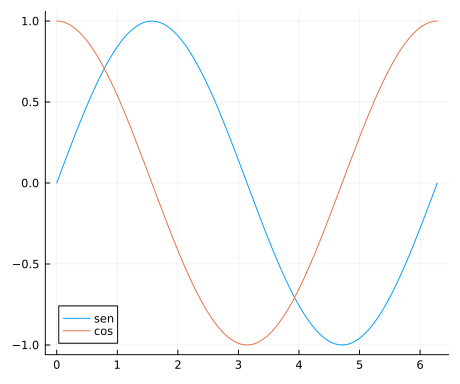

In [62]:
using Plots
plot(sin, 0, 2pi, label = "sen", size = (480,400))
plot!(cos, label = "cos")

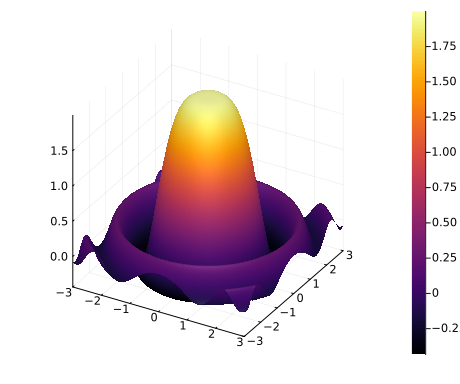

In [63]:
xs = ys = range(-3,3, length=100)
f(x,y) = 2sin(x^2+y^2) / (x^2+y^2)
surface(xs, ys, f, size = (480, 400))

WebIO._IJuliaInit()

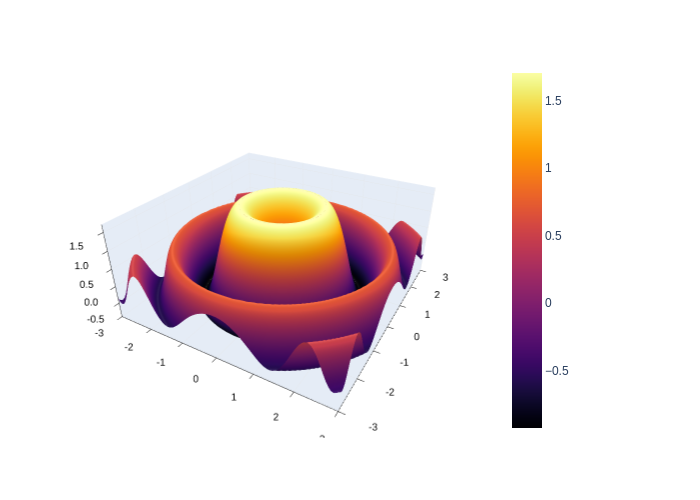

In [64]:
plotlyjs()
xs = ys = range(-3,3, length=100)
f(x,y) = 2sin(x^2+y^2) / sqrt(x^2+y^2)
surface(xs, ys, f)

In [65]:
using SymPy
@syms x::real y::real
typeof(x)

Sym

In [66]:
using Symbolics
@variables x y;
typeof(x)

Num

In [67]:
using SymPy
@syms x::real
SymPy.simplify(sin(x)^2 + cos(x)^2)

1

In [68]:
using SymPy
@syms x::real
SymPy.expand((x + 1)^2)

 2          
x  + 2⋅x + 1

In [69]:
SymPy.factor(x^3 - x^2 + x - 1)

        ⎛ 2    ⎞
(x - 1)⋅⎝x  + 1⎠

In [70]:
using Symbolics
@variables x;
Symbolics.simplify(sin(x)^2 + cos(x)^2)

1

In [71]:
using SymPy
@syms x y
expr = cos(x*y)
expr.subs([(x, 2), (y, π)])

1.00000000000000

In [72]:
expr(x=>2, y=>π)

1

In [73]:
using Symbolics
@variables x y
expr = cos(x*y)
substitute(expr, Dict([x=>2, y=>π]))

1.0

In [74]:
using SymPy
@syms x y
solveset(Eq(x^2, x))

{0, 1}

In [75]:
solveset(x^2 - x)

{0, 1}

In [76]:
solveset(sin(x) - 1)

⎧        π │      ⎫
⎨2⋅n⋅π + ─ │ n ∊ ℤ⎬
⎩        2 │      ⎭

In [77]:
solveset(x^2 - y, x)

{-√y, √y}

In [78]:
linsolve((x+y-3, x-y-1), (x,y))

{(2, 1)}

In [79]:
using Symbolics
@variables x y
Symbolics.solve_for([x + y ~ 3, x - y ~ 1], [x, y])

2-element Vector{Float64}:
 2.0
 1.0

In [80]:
using SymPy
@syms x
limit(sin(x) / x, x, 0)

1

In [81]:
limit(sin(x) / x, x=>0)

1

In [82]:
limit(1 / x, x, 0, "-")

-∞

In [83]:
limit(1 / x, x, 0, "+")

∞

In [84]:
using SymPy
@syms x y
diff(sin(x))

cos(x)

In [85]:
diff(sin(x), x, 2)

-sin(x)

In [86]:
SymPy.diff(ℯ^(x*y), x)

   x⋅y
y⋅ℯ   

In [87]:
diff(ℯ^(x*y), x, y)

           x⋅y
(x⋅y + 1)⋅ℯ   

In [88]:
using Symbolics
@variables x y
Symbolics.derivative(sin(x), x)

cos(x)

In [89]:
Dx = Symbolics.Differential(x)
expand_derivatives(Dx(sin(x)))

cos(x)

In [90]:
Dy = Symbolics.Differential(y)
expand_derivatives(Dy(Dx(ℯ^(x*y))))

x*y*exp(x*y) + exp(x*y)

In [91]:
using SymPy
@syms x y
diff.(ℯ^(x*y), (x, y))

(y*exp(x*y), x*exp(x*y))

In [92]:
hessian(ℯ^(x*y), (x,y))

2×2 Matrix{Sym}:
            y^2*exp(x*y)  x*y*exp(x*y) + exp(x*y)
 x*y*exp(x*y) + exp(x*y)             x^2*exp(x*y)

In [93]:
v = [diff.(f, [x, y]) for f in [x^2*y, x*y^2]]
hcat(v...)

2×2 Matrix{Sym}:
 2⋅x⋅y    y^2
   x^2  2⋅x⋅y

In [94]:
using Symbolics
@variables x y
Symbolics.gradient(ℯ^(x*y), [x, y])

2-element Vector{Num}:
 y*exp(x*y)
 x*exp(x*y)

In [95]:
Symbolics.hessian(ℯ^(x*y), [x, y])

2×2 Matrix{Num}:
 (y^2)*exp(x*y)               x*y*exp(x*y) + exp(x*y)
   x*y*exp(x*y) + exp(x*y)  (x^2)*exp(x*y)

In [96]:
Symbolics.jacobian([ℯ^(x*y), x*y], [x, y])

2×2 Matrix{Num}:
 y*exp(x*y)  x*exp(x*y)
  y           x

In [97]:
using SymPy
@syms x y
integrate(cos(x))

sin(x)

In [98]:
integrate(cos(x), (x, 0, π/2))

1.00000000000000

In [99]:
integrate(x^2 - y, (x, -1, 1), (y, -1, 1))

4/3

In [100]:
using Symbolics
using SymbolicNumericIntegration
@variables x y
SymbolicNumericIntegration.integrate(cos(x))

(sin(x), 0, 0)

In [101]:
SymbolicNumericIntegration.integrate(x^2 / (16 + x^2))

(x + 4atan((-1//4)*x), 0, 1.1102230246251565e-16)

In [102]:
using SymPy
@syms x k
y = SymFunction("y")
dsolve(diff(y(x),x) ~  k*y(x))

           k⋅x
y(x) = C₁⋅ℯ   

In [103]:
dsolve(diff(y(x),x) ~  k*y(x), ics = Dict(y(0) => 1))

        k⋅x
y(x) = ℯ   

In [104]:
using Polynomials
p = Polynomial([4,0,2,1])
p(2)

20

In [105]:
Polynomials.roots(p)

3-element Vector{ComplexF64}:
 -2.5943130163548487 + 0.0im
 0.29715650817742467 - 1.205625150602913im
 0.29715650817742467 + 1.205625150602913im

In [106]:
fit([1,2,3], [1, 0, 1])

Polynomial(4.0 - 4.0*x + 1.0*x^2)

In [107]:
using Interpolations
xs = 1:1:10
itp = Interpolations.interpolate(log.(xs), BSpline(Linear()))

10-element interpolate(::Vector{Float64}, BSpline(Linear())) with element type Float64:
 0.0
 0.6931471805599453
 1.0986122886681098
 1.3862943611198906
 1.6094379124341003
 1.791759469228055
 1.9459101490553132
 2.0794415416798357
 2.1972245773362196
 2.302585092994046

In [108]:
itp2 = Interpolations.interpolate(log.(xs), BSpline(Quadratic()))

10-element interpolate(OffsetArray(::Vector{Float64}, 0:11), BSpline(Quadratic(Line(OnGrid())))) with element type Float64:
 0.0
 0.6931471805599453
 1.09861228866811
 1.3862943611198904
 1.6094379124341005
 1.791759469228055
 1.9459101490553132
 2.0794415416798357
 2.1972245773362196
 2.302585092994046

In [109]:
A = [1 2 3; 0 1 0; 1 0 1]
B = [10, 2, 4]
A \ B

3-element Vector{Float64}:
 3.0
 2.0
 1.0

In [110]:
using LinearAlgebra
eigvals(A)

3-element Vector{Float64}:
 -0.7320508075688774
  1.0
  2.732050807568877

In [111]:
factorize(A)

LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
 1.0   0.0  0.0
 1.0   1.0  0.0
 0.0  -0.5  1.0
U factor:
3×3 Matrix{Float64}:
 1.0   2.0   3.0
 0.0  -2.0  -2.0
 0.0   0.0  -1.0

In [112]:
using Roots
f(x) = sin(x)
find_zeros(f, -5, 5)

3-element Vector{Float64}:
 -3.141592653589793
  0.0
  3.141592653589793

In [113]:
using LinearSolve
A = [1.0 2 3; 0 1 0; 1 0 1]
B = [10.0, 2, 4]
solve(LinearProblem(A, B))

u: 3-element Vector{Float64}:
 3.0
 2.0
 1.0

In [114]:
using NLsolve
f(x, y) = [(x+3)*(y^3-7)+18, sin(y*exp(x)-1)]
f(x) = [(x[1]+3)*(x[2]^3-7)+18, sin(x[2]*exp(x[1])-1)]
nlsolve(f, [ 0.1, 1.2])

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.1, 1.2]
 * Zero: [-7.775548712324193e-17, 0.9999999999999999]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [115]:
using ForwardDiff
f(x) = exp(-x^2)
ForwardDiff.derivative(f, 1)

-0.7357588823428847

In [116]:
using QuadGK
f(x) = x^x
quadgk(f, 0, 1)

(0.7834305106229383, 4.864047812094818e-9)

In [117]:
quadgk(f, big(0), big(1), rtol = 1e-30)

(0.7834305107121344070592643865269751743063670117483685034318247197232693913877173, 7.736858106873745132469365322882480666696649544982787019412483807349385217202092e-31)

In [118]:
quadgk(x -> ℯ^(-x^2), -Inf, Inf)

(1.7724538509055137, 6.4296367091810765e-9)

In [119]:
10^19

-8446744073709551616

In [120]:
BigInt(10)^19

10000000000000000000